## Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

### LDA

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})

plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()
# print(iris.DESCR)

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [5]:
data = data[['sepal length (cm)', 'sepal width (cm)']]
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size = 0.25)

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [9]:
lda.predict(X_test)

array([2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0,
       1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2])

In [10]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
# result

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.8421052631578947

Text(0.5, 1.0, 'LDA model categories')

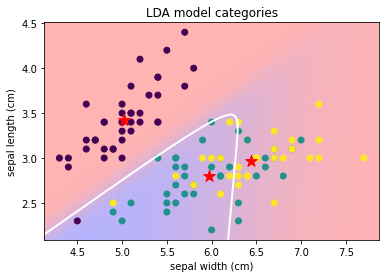

In [25]:
## Отображение модели

# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c = y_train)

# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.ylabel('sepal length (cm)')
plt.xlabel('sepal width (cm)')
plt.title('LDA model categories')

In [13]:
lda.coef_

array([[-6.56296819,  8.50238883],
       [ 2.64338728, -4.63255485],
       [ 4.76676504, -4.82524908]])

### Clustering

Text(0.5, 1.0, 'Sepal length vs. Sepal width (not normalized)')

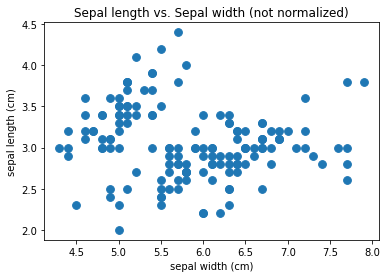

In [27]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='autumn', s=60)
plt.ylabel('sepal length (cm)')
plt.xlabel('sepal width (cm)')
plt.title('Sepal length vs. Sepal width (not normalized)')

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
data_scaled = scaler.fit_transform(data)
# data_scaled

Text(0.5, 1.0, 'Sepal length vs. Sepal width (normalized)')

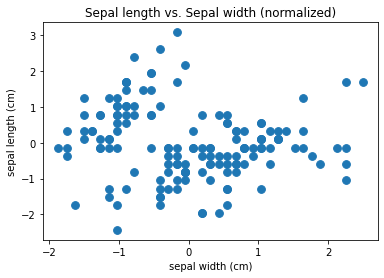

In [30]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='autumn', s=60)
plt.ylabel('sepal length (cm)')
plt.xlabel('sepal width (cm)')
plt.title('Sepal length vs. Sepal width (normalized)')

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(data_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, 'K-means division into 3 clusters')

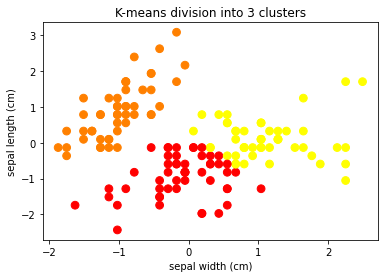

In [33]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='autumn', c=clusters, s=60)
plt.ylabel('sepal length (cm)')
plt.xlabel('sepal width (cm)')
plt.title('K-means division into 3 clusters')

Text(0.5, 1.0, 'K-means elbow method')

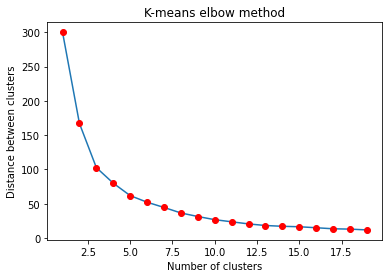

In [34]:
k_inertia = []
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.ylabel('Distance between clusters')
plt.xlabel('Number of clusters')
plt.title('K-means elbow method')

Elbow method conclusion: biggest change in distance happening when going from 1 to 2 clusters, still a significant change between 2 and 3 clusters. Three clusters would be optimal.